In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
import tensorflow as tf
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from gensim.models import Word2Vec

In [452]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    # 'Naive Bayes': GaussianNB(),
    # 'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    # 'Random Forest': RandomForestClassifier(random_state=42),
    # 'AdaBoost': AdaBoostClassifier(random_state=42),
    # 'SVM': SVC(random_state=42)
}

In [453]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrtat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mrtat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [454]:
data = pd.read_csv(r"C:\Users\mrtat\Downloads\NTI\Data\twitter_training.csv",
                      encoding="ISO-8859-1" )

In [455]:
test = pd.read_csv(r"C:\Users\mrtat\Downloads\NTI\Data\twitter_validation.csv",
                      encoding="ISO-8859-1" )

In [456]:
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [457]:
test

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tomâs great auntie as âHayley canât get out of bedâ and told to his grandma, who now thinks Iâm a lazy, terrible person ð¤£"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [458]:
data.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [459]:
data.dropna(inplace=True)

In [460]:
test.isnull().sum()

3364                                                                                                                                                                                                                                                               0
Facebook                                                                                                                                                                                                                                                           0
Irrelevant                                                                                                                                                                                                                                                         0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tomâs great auntie as âHayley canât get out of bedâ and told to his grandma, who now thi

In [461]:
test.dropna(inplace=True)

In [462]:
data.duplicated().sum()

np.int64(2340)

In [463]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [464]:
test.duplicated().sum()

np.int64(0)

In [465]:
test.drop_duplicates(inplace=True)
test.reset_index(drop=True, inplace=True)

In [466]:
data.loc[-1] = data.columns       # Add old headers as first row
data.columns = ['id', 'game', 'sentiment', 'comment']
data.index = data.index + 1       # Shift index
data = data.sort_index()          # Reorder rows
data.reset_index(drop=True, inplace=True)
data

,id,game,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
71651,9200,Nvidia,Positive,Just realized that the Windows partition of my...
71652,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
71653,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
71654,9200,Nvidia,Positive,Just realized between the windows partition of...


In [467]:
test.loc[-1] = test.columns       # Add old headers as first row
test.columns = ['id', 'game', 'sentiment', 'comment']

test.index = test.index + 1       # Shift index
test = test.sort_index()          # Reorder rows
test.reset_index(drop=True, inplace=True)
test

,id,game,sentiment,comment
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


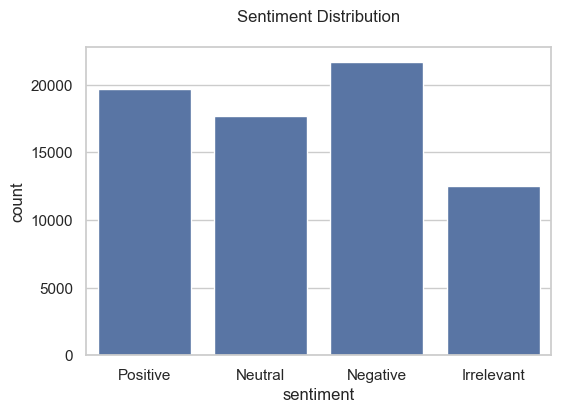

In [468]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution\n')
plt.show()

In [469]:
data.replace({'sentiment':{4:1}}, inplace=True)
print(data['sentiment'].value_counts())

sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64


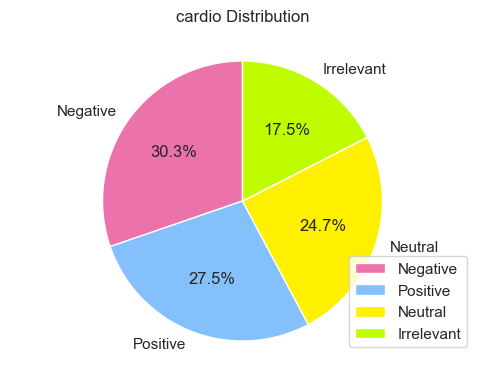

In [470]:
counts = data['sentiment'].value_counts()
counts.plot(
    kind='pie',
    figsize=(6, 4),
    autopct='%1.1f%%',   # add in percentages
    startangle=90,       # start angle 90°   
    colors=["#eb72aa","#84c0fc","#fff000","#c0fc00"] 
)
plt.title('cardio Distribution\n')
plt.axis('equal')  # Sets the pie chart to look like a circle.
plt.legend(labels=counts.index)
plt.ylabel('')  # Hide y-label
plt.show()

In [471]:
data.drop(['id'], inplace=True,axis=1)

In [472]:
test.drop(['id'], inplace=True,axis=1)

In [473]:
for c in ['game','sentiment']:
    lb = LabelEncoder()
    data[c] = lb.fit_transform(data[c])

In [474]:
for c in ['game','sentiment']:
    lb = LabelEncoder()
    test[c] = lb.fit_transform(test[c])

In [475]:
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|@\S+|#\S+|[^a-z\s]", '', text)  # remove links, mentions, hashtags, punctuation
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(words)

# Apply to data
data['clean_text'] = data['comment'].apply(clean_text)
test['clean_text'] = test['comment'].apply(clean_text)


In [476]:
data

,game,sentiment,comment,clean_text
0,4,3,im getting on borderlands and i will murder yo...,im getting borderland murder
1,4,3,I am coming to the borders and I will kill you...,coming border kill
2,4,3,im getting on borderlands and i will kill you ...,im getting borderland kill
3,4,3,im coming on borderlands and i will murder you...,im coming borderland murder
4,4,3,im getting on borderlands 2 and i will murder ...,im getting borderland murder
...,...,...,...,...
71651,21,3,Just realized that the Windows partition of my...,realized window partition mac like year behind...
71652,21,3,Just realized that my Mac window partition is ...,realized mac window partition year behind nvid...
71653,21,3,Just realized the windows partition of my Mac ...,realized window partition mac year behind nvid...
71654,21,3,Just realized between the windows partition of...,realized window partition mac like year behind...


In [477]:
test

,game,sentiment,comment,clean_text
0,11,0,I mentioned on Facebook that I was struggling ...,mentioned facebook struggling motivation go ru...
1,0,2,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon bos jeff bezos reject claim co...
2,19,1,@Microsoft Why do I pay for WORD when it funct...,pay word function poorly chromebook
3,5,1,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
4,13,2,Now the President is slapping Americans in the...,president slapping american face really commit...
...,...,...,...,...
995,14,0,â­ï¸ Toronto is the arts and culture capital...,toronto art culture capital canada wonder want...
996,5,0,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewer one people...
997,4,3,Today sucked so itâs time to drink wine n pl...,today sucked time drink wine n play borderland...
998,19,3,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small win


In [478]:
data.isnull().sum()

game          0
sentiment     0
comment       0
clean_text    0
dtype: int64

In [479]:
test.isnull().sum()

game          0
sentiment     0
comment       0
clean_text    0
dtype: int64

In [480]:
data.duplicated().sum()

np.int64(698)

In [481]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [482]:
test.duplicated().sum()

np.int64(0)

In [483]:
X_train=data['clean_text']
y_train=data['sentiment']

In [484]:
X_test=test['clean_text']
y_test=test['sentiment']

In [485]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
results = {}
# models from 1.1 part
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred)
    }

In [498]:
best_model_name = metrics_df['Accuracy'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model based on Accuracy: {best_model_name}\n")



Best Model based on Accuracy: Decision Tree



In [496]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Accuracy 0.954

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       172
           1       0.97      0.95      0.96       266
           2       0.96      0.96      0.96       285
           3       0.95      0.95      0.95       277

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

